In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time,random
import numpy as np
import scipy.stats as scistats
import stabilityUtils as su

In [2]:
EXPERIMENT_25_09_FILE = "../src/build/csv/experiment-25-09-2025.csv"
EXPERIMENT_28_10_FILE = "../src/build/csv/experiment-28-10-2025.csv"

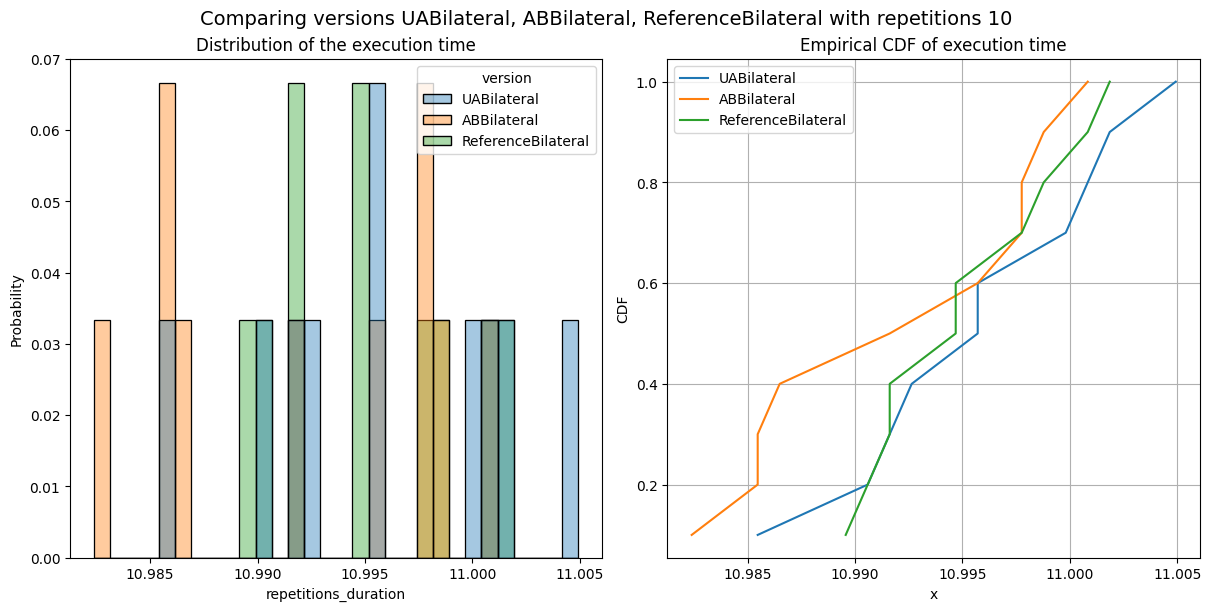

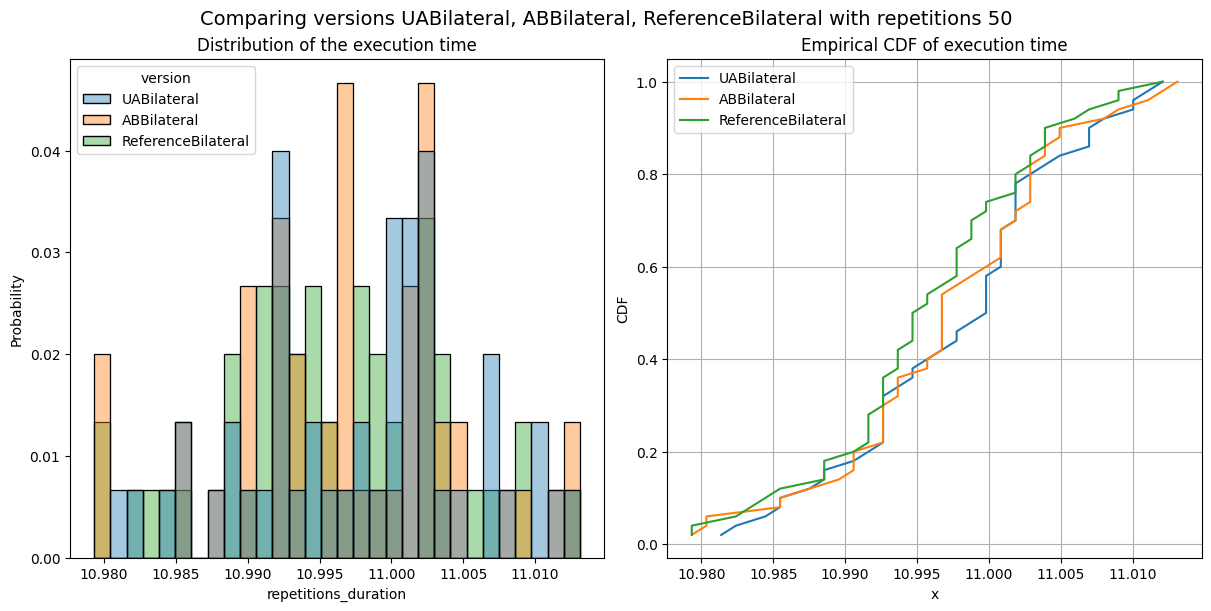

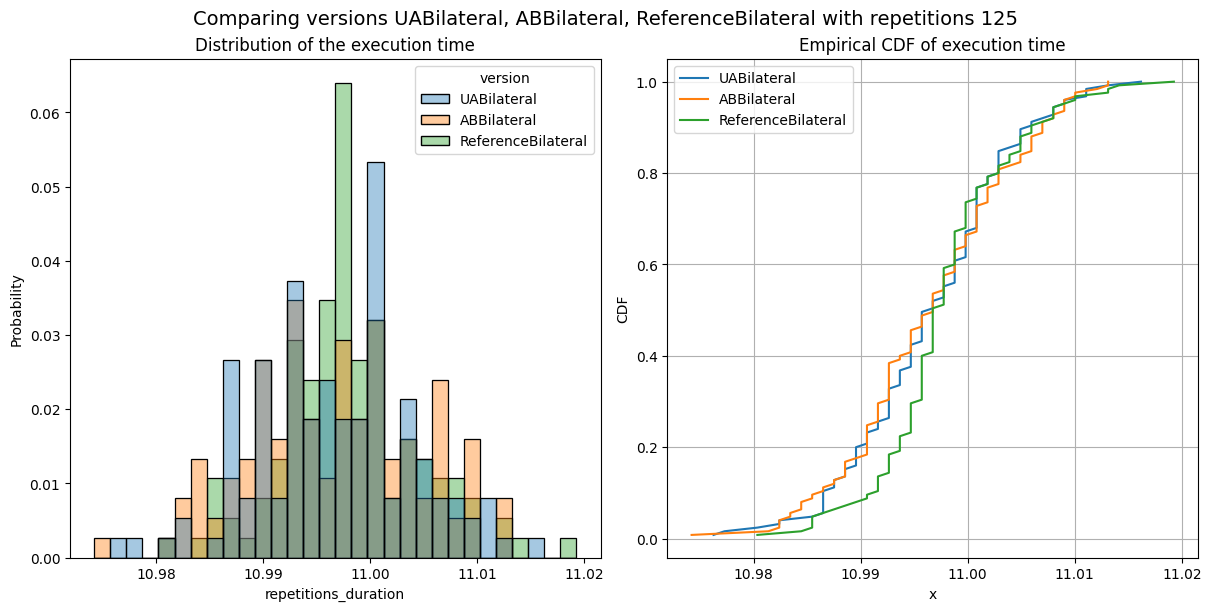

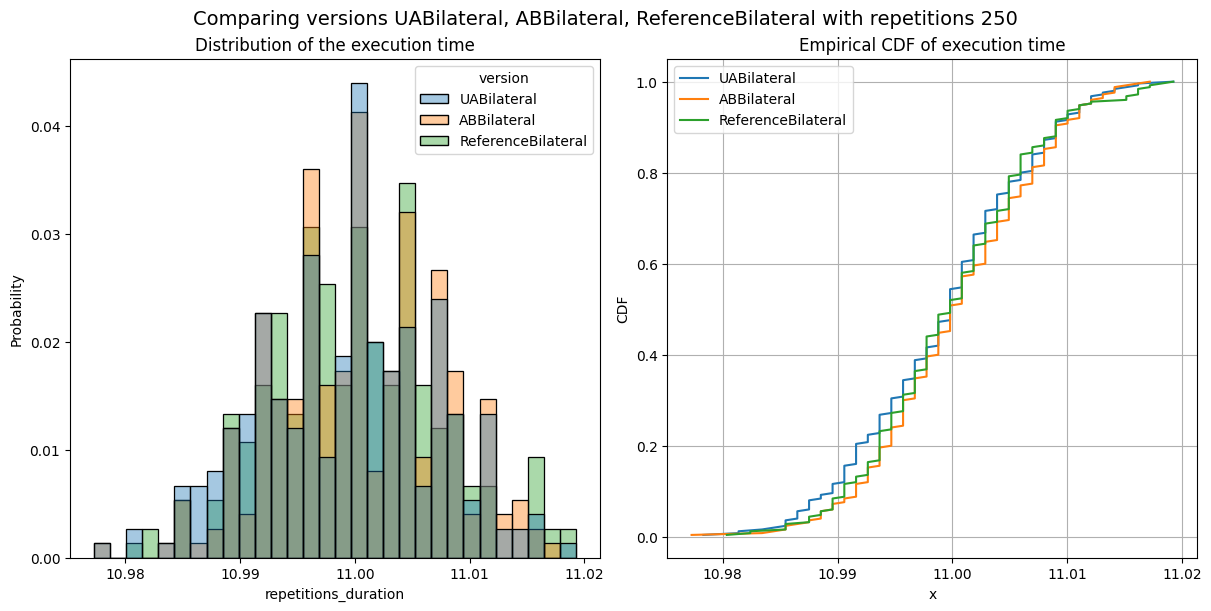

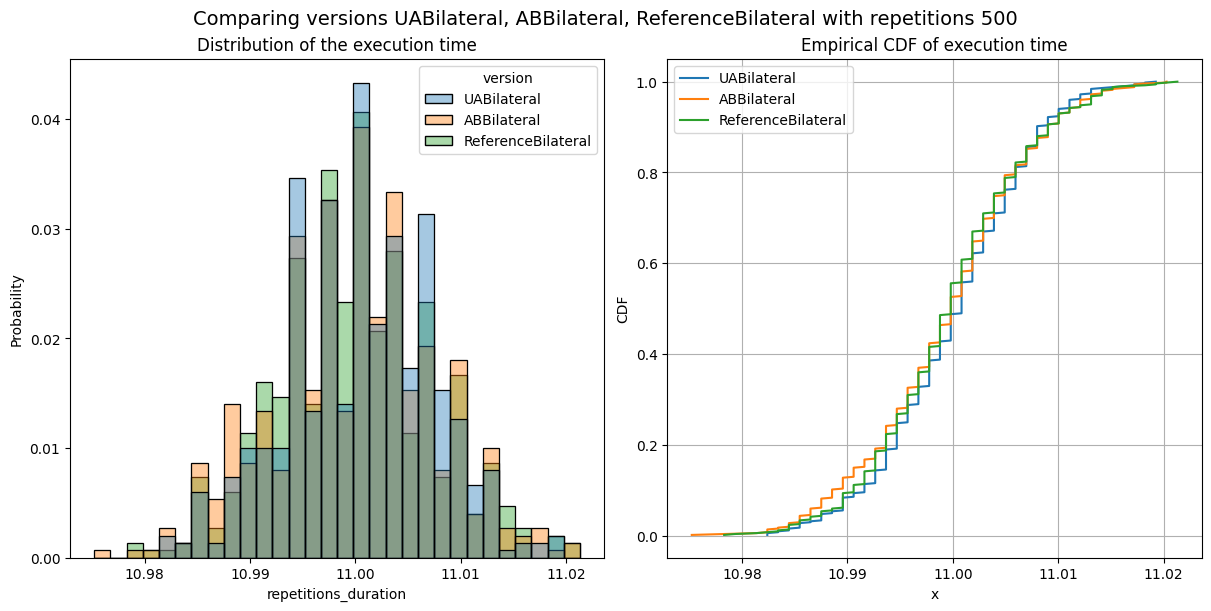

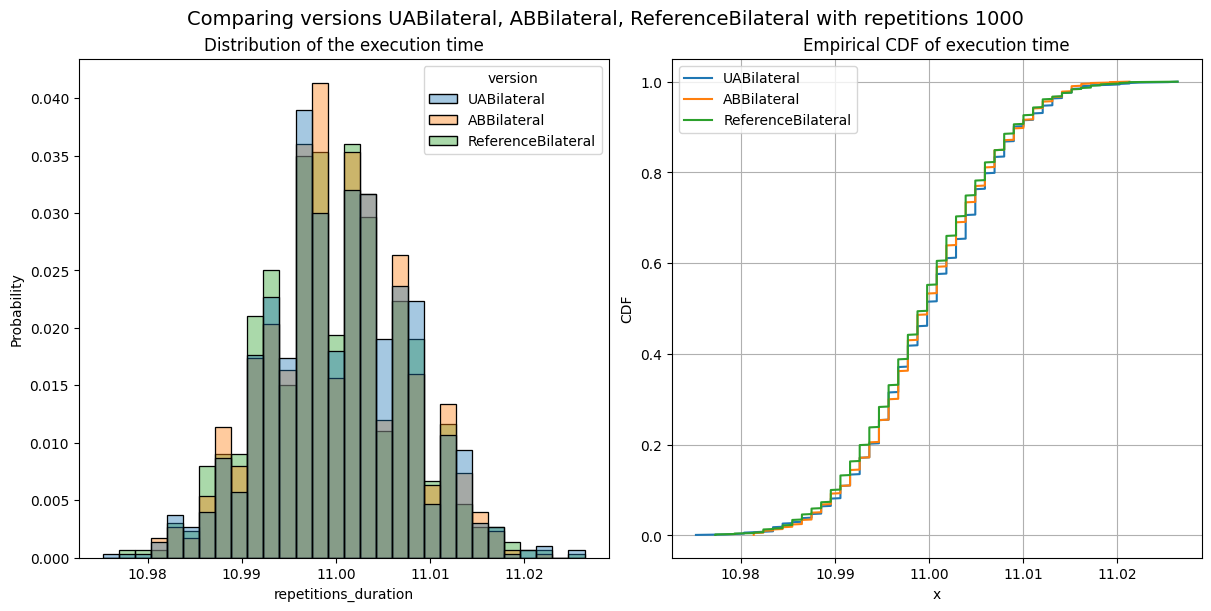

In [3]:
df_e = su.load_experiment(EXPERIMENT_25_09_FILE)
temp_df = df_e[df_e["warmups"]==5]
temp_df = temp_df[temp_df["kernel"].str.contains("Bilateral")]
versions = ["ReferenceBilateral","ABBilateral","UABilateral"]
temp_df = temp_df[temp_df["version"].isin(versions)]

su.plot_all_single_kernel_multiple_rep(temp_df)

In [4]:
DF_EXPERIMENT_PICKLE = "./boostrapped_data.df.pickle"
df_experiment_boostraped = su.load_or_compute(DF_EXPERIMENT_PICKLE,su.load_n_compute_dataframe,EXPERIMENT_25_09_FILE)

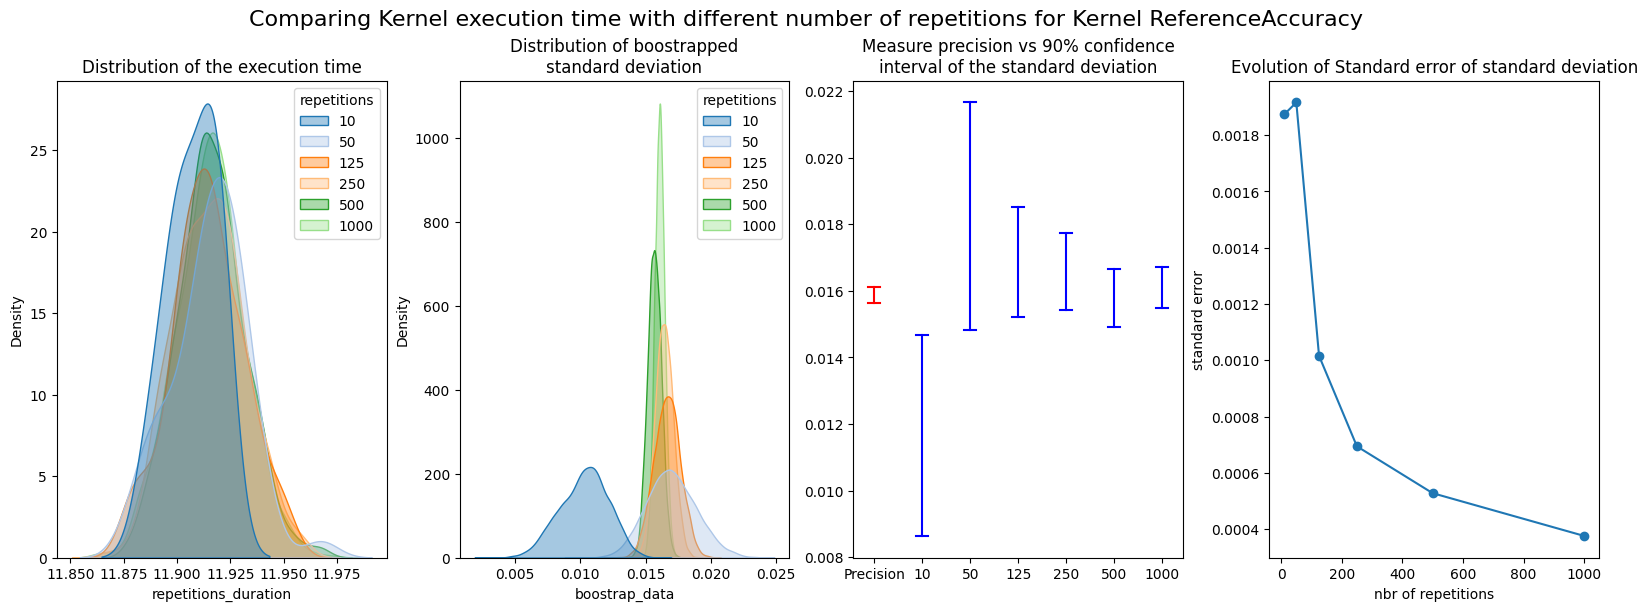

In [5]:
f = su.plot_compare_repetitions_single_version(df_experiment_boostraped)

In [6]:
EXPERIMENT_ORIGINAL_VS_BLOCKING_FILE = "../src/build/csv/originalvsblockingvsnoflush_small.csv"
df_now = su.load_experiment(EXPERIMENT_ORIGINAL_VS_BLOCKING_FILE)
df_now_w5 = df_now[df_now["warmups"]==5].copy()
df_now_w5 = df_now_w5.sort_values(by='repetitions')
df_now_boot = su.load_n_compute_dataframe(dataframe=df_now_w5)

100%|██████████| 30/30 [00:01<00:00, 17.94it/s] 


In [7]:
df_now_boot

,memcpy2D,memcpy2H,warmup_duration,repetitions_duration,warmups,repetitions,kernel,version,ci_low,ci_high,ci_level,boostrap_data,std_error
3,0.292864,0.184320,"[0.259072, 0.176128, 0.171008, 0.172032, 0.172...","[0.17408, 0.17408, 0.172032, 0.173056, 0.17305...",5,10,Bilateral,NoFlushBilateral,0.000793,0.001311,0.9,"[0.0007168000000000086, 0.0011941789480643256,...",0.000169
4,0.293888,0.185344,"[0.26112, 0.17408, 0.172032, 0.173056, 0.17408]","[0.173056, 0.17408, 0.177152, 0.175104, 0.1740...",5,10,Bilateral,OriginalBilateral,0.001003,0.002056,0.9,"[0.0010033109986439966, 0.0008927025036371402,...",0.0003
5,0.296960,0.189440,"[0.262144, 0.172032, 0.173056, 0.172032, 0.173...","[0.176128, 0.175104, 0.175104, 0.172032, 0.177...",5,10,Bilateral,BlockingBilateral,0.000793,0.001999,0.9,"[0.0016543226287517243, 0.001504966497965991, ...",0.000376
6,0.299008,0.186368,"[0.258048, 0.17408, 0.17408, 0.175104, 0.176128]","[0.177152, 0.172032, 0.173056, 0.172032, 0.174...",5,50,Bilateral,NoFlushBilateral,0.001602,0.002565,0.9,"[0.0019724696171044102, 0.002081013906729126, ...",0.00028
7,0.295936,0.183296,"[0.259072, 0.172032, 0.171008, 0.172032, 0.173...","[0.17408, 0.176128, 0.177152, 0.17408, 0.17305...",5,50,Bilateral,OriginalBilateral,0.001451,0.002026,0.9,"[0.0016334003717398918, 0.00184046730761511, 0...",0.00017
8,0.295936,0.186368,"[0.26112, 0.171008, 0.172032, 0.17408, 0.172032]","[0.176128, 0.178176, 0.176128, 0.181248, 0.175...",5,50,Bilateral,BlockingBilateral,0.001904,0.002784,0.9,"[0.0023632890653493915, 0.0018478590006816011,...",0.000263
9,0.295936,0.182272,"[0.26112, 0.172032, 0.176128, 0.178176, 0.169984]","[0.172032, 0.17408, 0.17408, 0.173056, 0.16896...",5,125,Bilateral,NoFlushBilateral,0.001708,0.002288,0.9,"[0.002013299626384512, 0.0022850541071020654, ...",0.000169
10,0.294912,0.189440,"[0.262144, 0.169984, 0.171008, 0.169984, 0.173...","[0.173056, 0.175104, 0.173056, 0.173056, 0.177...",5,125,Bilateral,OriginalBilateral,0.001677,0.002041,0.9,"[0.0020638963233496057, 0.0019419705768481698,...",0.00011
11,0.294912,0.193536,"[0.260096, 0.172032, 0.173056, 0.17408, 0.173056]","[0.176128, 0.176128, 0.181248, 0.17408, 0.1761...",5,125,Bilateral,BlockingBilateral,0.001853,0.002285,0.9,"[0.002064871561472049, 0.002163618708826492, 0...",0.000127
14,0.296960,0.195584,"[0.264192, 0.176128, 0.175104, 0.173056, 0.173...","[0.177152, 0.17408, 0.175104, 0.17408, 0.17408...",5,250,Bilateral,BlockingBilateral,0.001603,0.001932,0.9,"[0.0017691164087148162, 0.0016809377174232278,...",0.000098


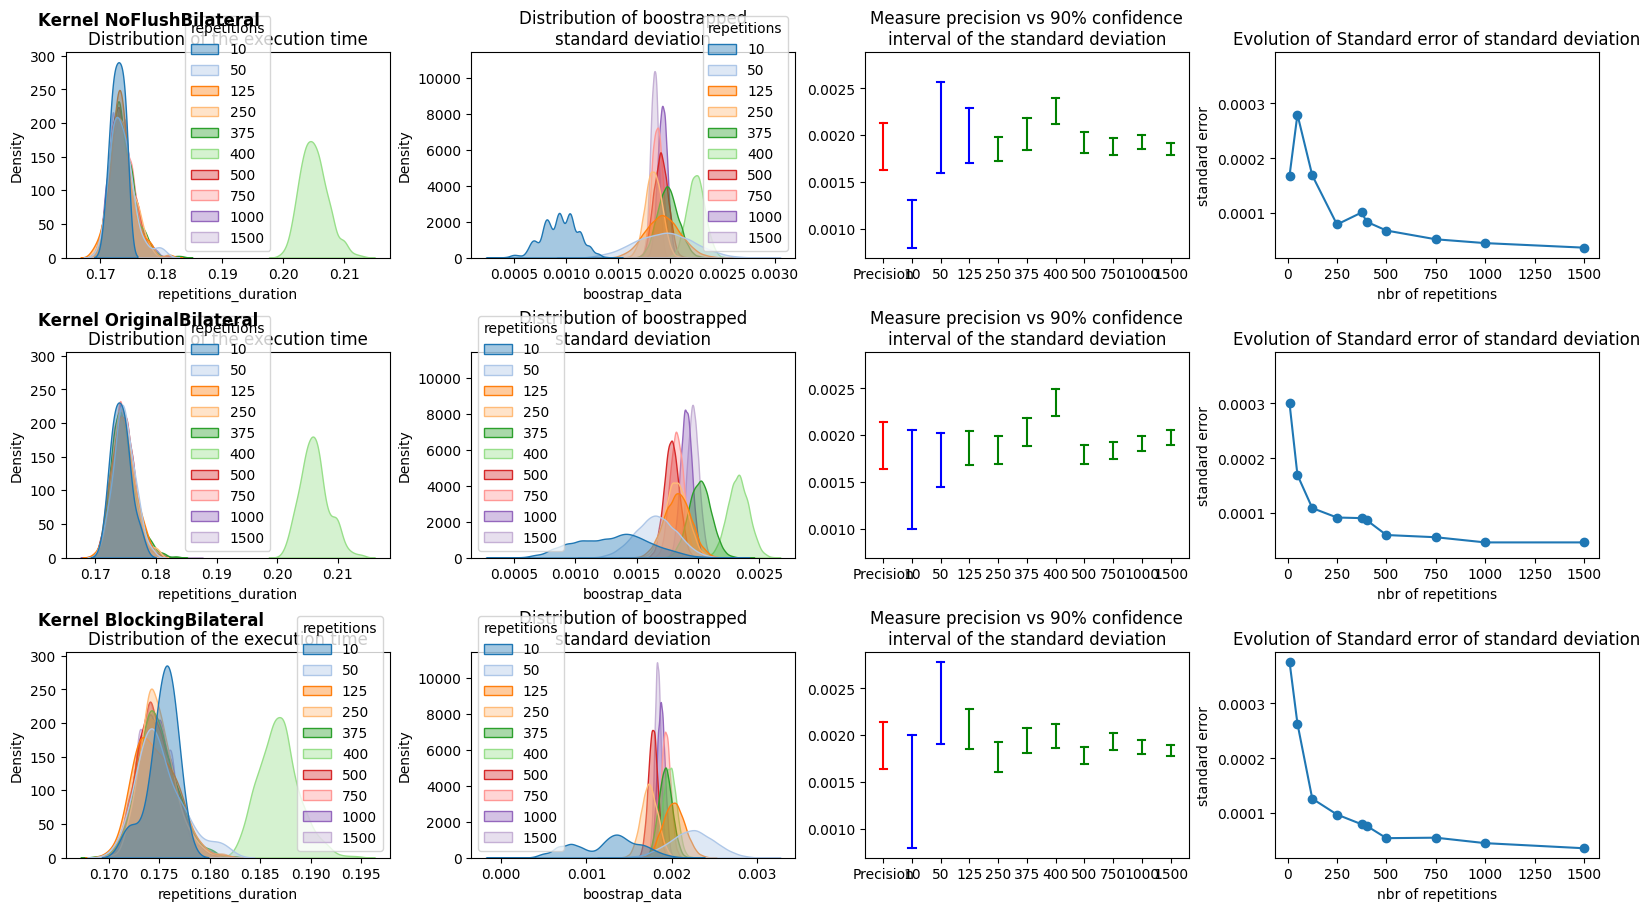

In [8]:
f = su.plot_compare_repetitions_multiple_version(df_now_boot)

100%|██████████| 27/27 [00:01<00:00, 15.70it/s]


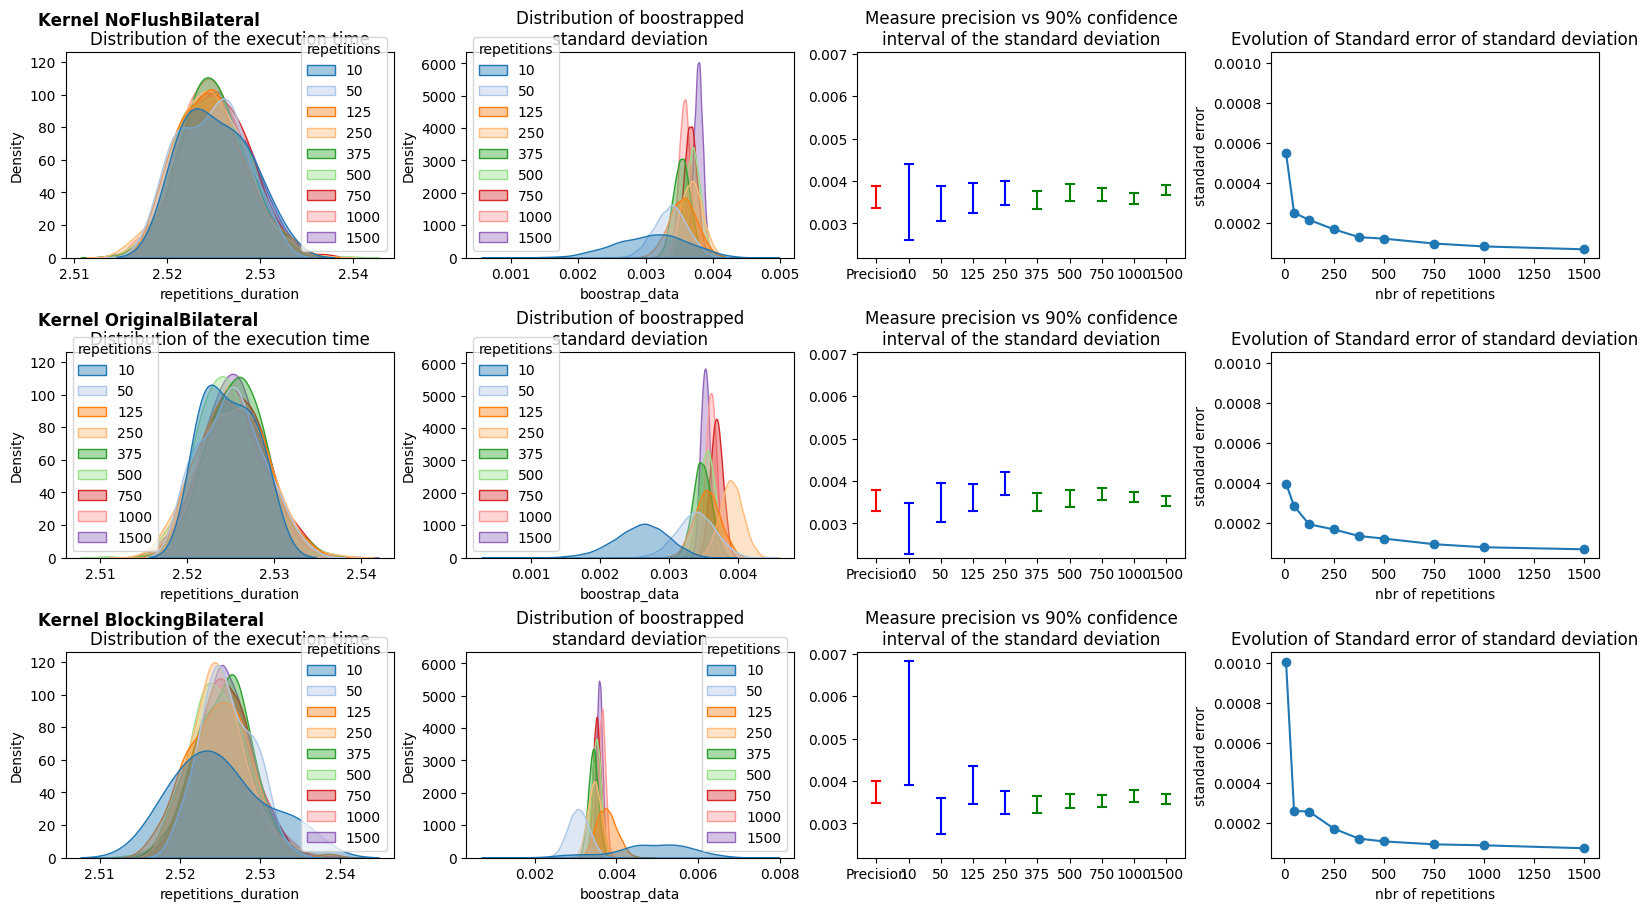

In [9]:
EXPERIMENT_ORIGINAL_VS_BLOCKING_FILE = "../src/build/csv/originalvsblockingvsnoflush_big.csv"
df_now = su.load_experiment(EXPERIMENT_ORIGINAL_VS_BLOCKING_FILE)
df_now_w5 = df_now[df_now["warmups"]==5].copy()
df_now_w5 = df_now_w5.sort_values(by='repetitions')
df_now_w5 = df_now_w5[df_now_w5['repetitions'] != 400]
df_now_boot = su.load_n_compute_dataframe(dataframe=df_now_w5)
f = su.plot_compare_repetitions_multiple_version(df_now_boot)

In [ ]:
EXPERIMENT_ORIGINAL_VS_BLOCKING_LOCKED_FILE = "../src/build/csv/originalvsblockingvsnoflush_big_lock_clock.csv"
df_now = su.load_experiment(EXPERIMENT_ORIGINAL_VS_BLOCKING_LOCKED_FILE)
df_now_w5 = df_now[df_now["warmups"]==5].copy()
df_now_w5 = df_now_w5.sort_values(by='repetitions')
df_now_w5 = df_now_w5[df_now_w5['repetitions'] != 400]
df_now_boot = su.load_n_compute_dataframe(dataframe=df_now_w5)
f = su.plot_compare_repetitions_multiple_version(df_now_boot)

100%|██████████| 27/27 [00:01<00:00, 17.52it/s] 


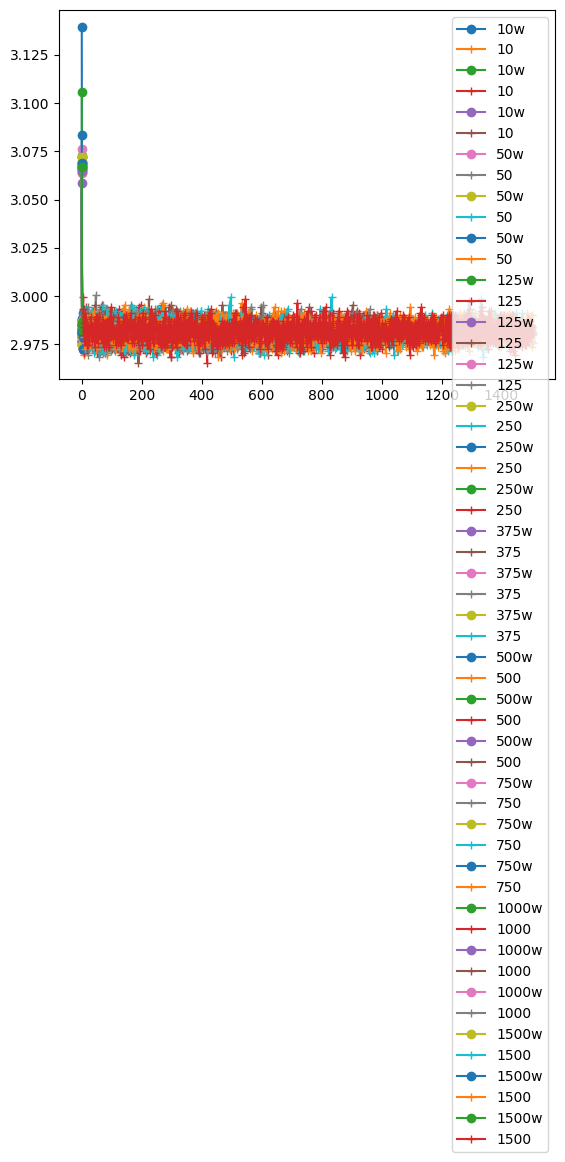

In [ ]:
nbr = 0
for i,row in df_now.iterrows():
    if row.repetitions:
        plt.plot(np.arange(0,row.warmups),row.warmup_duration,label=str(row.repetitions)+"w",marker='o')
        #plt.plot(np.arange(row.warmups,min(20,row.repetitions)+row.warmups),row.repetitions_duration[:min(20,row.repetitions)],label=row.repetitions, marker="+")
        plt.plot(np.arange(row.warmups,row.repetitions+row.warmups),row.repetitions_duration,label=row.repetitions, marker="+")
        nbr+=1
plt.legend()
